# Reading & Understanding the Data 

In [1]:
# Importing numpy & pandas 
import numpy as np 
import pandas as pd 
# Importing visualization liabrary 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Importing warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 
df = pd.read_csv("day.csv")

In [3]:
# Reading the dataset 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking Rows & Columns 
df.shape

(730, 16)

In [5]:
# Information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking unique values 
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
# Statistical info of the Dataset 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Dropping unnecessary columns
- As we can see instant is a record index column which is not useful for prediction, we can drop this column 
- We can drop dteday column because we have separate month & year column 
- We can drop casual & registered columns as we have cnt column which is the sum of both columns 

In [8]:
df.drop(['instant','casual','registered','dteday'],inplace = True, axis = 1)

##### Converting some column's value 

In [9]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [12]:
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [13]:
df.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [14]:
df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [15]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Handling missing values 

In [18]:
# Checking missing values
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- As we can see there are 0 missing values, we don't need to handle missing values 

##### Handling Outliers 
- For checking outliers we need to use boxplot 

atemp


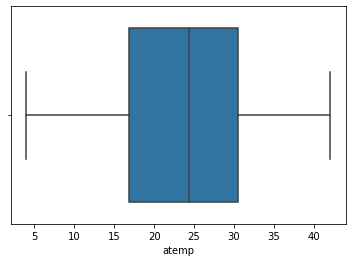

hum


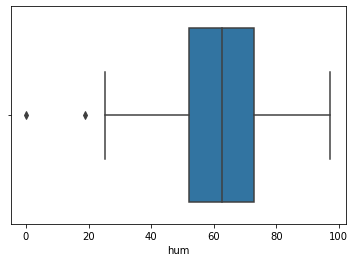

windspeed


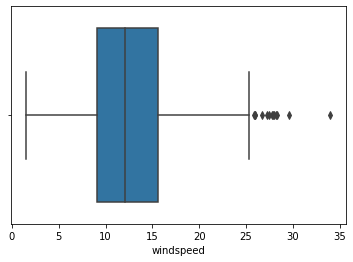

temp


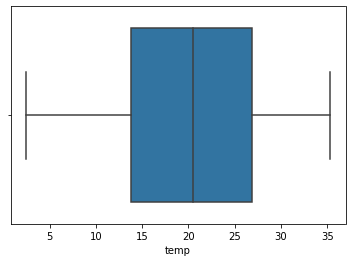

In [19]:
continious_cols = ['atemp','hum','windspeed','temp']
for i in continious_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

- As we can see there are no outliers to be treated 

# Visualising the Data 

##### Visualising numeric columns 

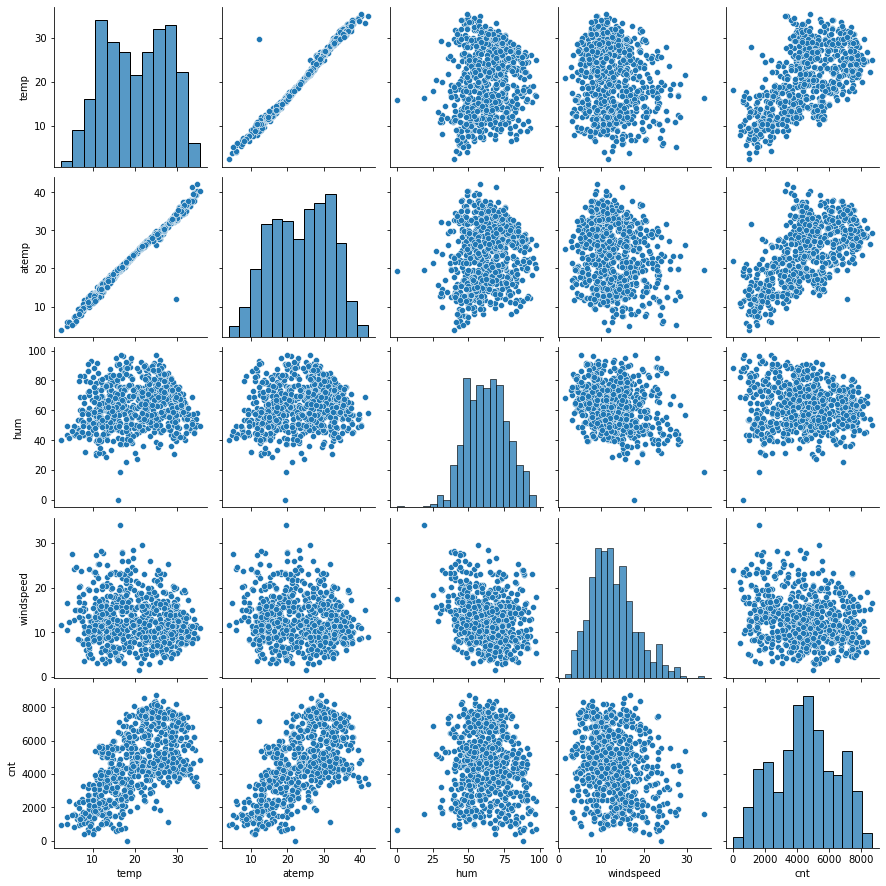

In [20]:
sns.pairplot(data = df, vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### Visualising categorical columns 

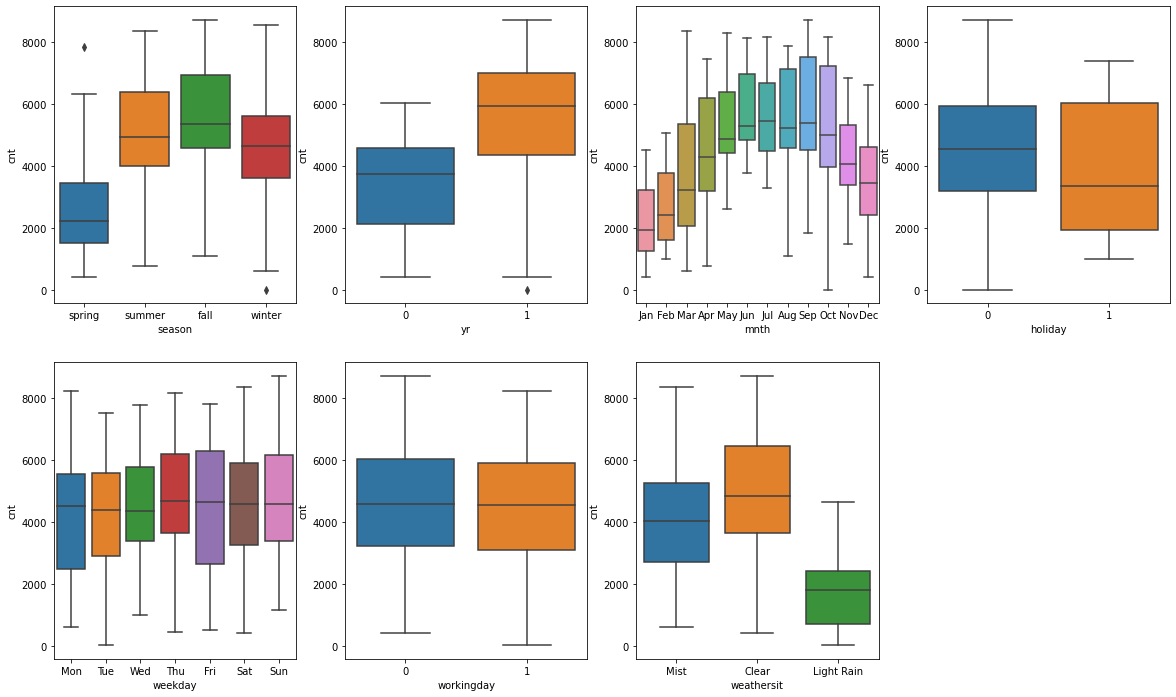

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

## Data preparation 

##### Dummy variable 
The variables `season,mnth,weekday,weathersit` has different levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [22]:
# Get the dummy variables 
season_dummy = pd.get_dummies(df['season'])
mnth_dummy = pd.get_dummies(df['mnth'])
weekday_dummy = pd.get_dummies(df['weekday'])
weathersit_dummy = pd.get_dummies(df['weathersit'])

In [23]:
# Dropping first column from the variables using 'drop_first = True'
season_dummy = pd.get_dummies(df['season'],drop_first = True)
mnth_dummy = pd.get_dummies(df['mnth'],drop_first = True)
weekday_dummy = pd.get_dummies(df['weekday'],drop_first = True)
weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first = True)

In [24]:
# Add the results to the original dataframe
df = pd.concat([df,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy], axis = 1)

In [25]:
# Let's see the Dataframe once 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Let's drop the original columns as we have created the dummies for it 
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [27]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training & Testing sets
- As we know, the first basic step for regression is performing a train-test split.

In [28]:
# Importing liabrary 

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 50)

In [29]:
# Checking the shape of train dataset 
df_train.shape

(510, 30)

In [30]:
# Checking the shape of test dataset 
df_test.shape

(219, 30)

### Rescaling the Features 
Here we can see that except for `temp,atemp,windspeed,hum`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [31]:
from sklearn.preprocessing import MinMaxScaler 

In [32]:
scaler = MinMaxScaler()

In [33]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Rain', 'Mist'],
      dtype='object')

In [34]:
# We will apply scaler() to all the columns except 'yes- no' & dummy columns.
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
707,1,0,1,0.417140,0.434610,0.933018,0.243629,0.368845,0,0,...,0,0,1,0,0,0,0,0,0,1
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0.141049,1,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0.412333,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0.586401,0,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Statistical summary of the training dataset 
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552680,0.545242,0.644848,0.318203,0.509945,0.245098,0.254902,...,0.086275,0.064706,0.137255,0.149020,0.133333,0.145098,0.149020,0.149020,0.031373,0.341176
std,0.500179,0.151726,0.459559,0.230600,0.223322,0.149640,0.167086,0.223408,0.430568,0.436234,...,0.281045,0.246248,0.344454,0.356457,0.340268,0.352545,0.356457,0.356457,0.174494,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197916,0.350523,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.516222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752576,0.406471,0.672141,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


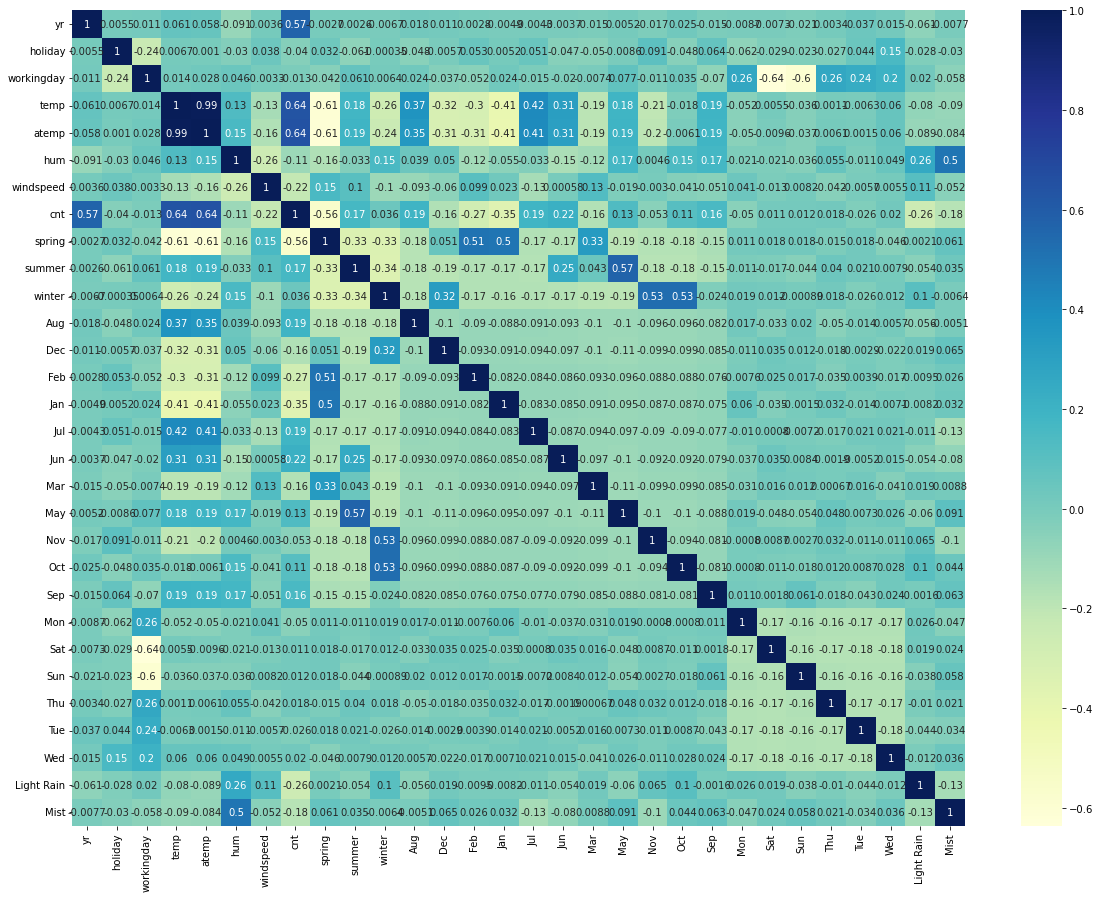

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As we can see temp,atemp & yr correlated with cnt variable 

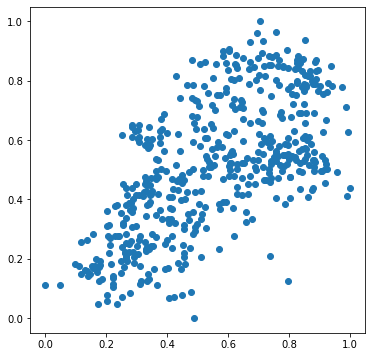

In [38]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X & Y sets for the Model Building 

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

- Fit a regression line through the training data using `statsmodels`.In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [40]:
import statsmodels.api as sm 

# Adding a constant 
X_train_lm = sm.add_constant(X_train[['temp']])

# Creating first fitted model 
lr = sm.OLS(y_train,X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const    0.166808
temp     0.620860
dtype: float64

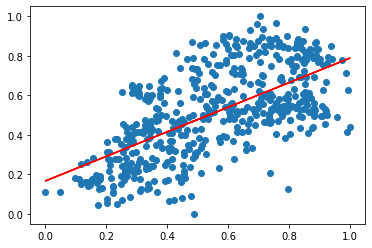

In [42]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.167 + 0.621*X_train_lm.iloc[:, 1], 'r')
plt.show()

### Using Recursive Features Elimination (RFE)

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
# Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)

In [46]:
# Checking the Features which are selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 3),
 ('Feb', False, 6),
 ('Jan', False, 4),
 ('Jul', False, 5),
 ('Jun', False, 9),
 ('Mar', False, 15),
 ('May', False, 8),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 10),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light Rain', True, 1),
 ('Mist', True, 1)]

In [47]:
# Columns which are selected by RFE 
Columns = X_train.columns[rfe.support_]
Columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Sep', 'Sat', 'Sun', 'Light Rain',
       'Mist'],
      dtype='object')

In [48]:
# Columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [49]:
X_train_1 = X_train[Columns]

##### Calculating VIF

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Defining function to calculate VIF
def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## Building Model 

#### Model - 1

In [52]:
# Building the linear regression model
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train,X_train_lm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.46e-190
Time:                        23:40:02   Log-Likelihood:                 520.12
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3755      0.079      4.736      0.0

In [53]:
# Calculating VIF
VIF(X_train_1)

,Features,VIF
3,temp,389.59
4,atemp,376.56
2,workingday,41.59
5,hum,37.41
11,Sat,9.43
12,Sun,8.15
7,spring,6.14
6,windspeed,5.56
9,winter,4.65
8,summer,3.03


##### Dropping the Variable and Updating the Model

As we can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.
The variable `atemp` has a significantly high VIF (`376.56`) and a high p-value (`0.645`) as well. Hence, this variable isn't of much use and should be dropped.

In [54]:
# Dropping hum 
X = X_train_1.drop('atemp', axis = 1)

#### Model - 2

In [55]:
X_train_lm_2 = sm.add_constant(X)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.92e-191
Time:                        23:40:03   Log-Likelihood:                 520.01
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3750      0.079      4.734      0.0

In [56]:
VIF(X)

,Features,VIF
2,workingday,41.58
4,hum,37.22
3,temp,22.68
10,Sat,9.41
11,Sun,8.15
6,spring,6.08
5,windspeed,5.39
8,winter,4.54
7,summer,2.93
13,Mist,2.49


As we can notice `workingday` has high p-value & High VIF. Hence, we can drop it 

In [57]:
# Dropping workingday  
X = X.drop('workingday', axis = 1)

#### Model - 3

In [58]:
X_train_lm_3 = sm.add_constant(X)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          3.29e-192
Time:                        23:40:03   Log-Likelihood:                 519.05
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     496   BIC:                            -950.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2772      0.034      8.104      0.0

In [59]:
VIF(X)

,Features,VIF
3,hum,28.49
2,temp,15.49
4,windspeed,4.73
5,spring,4.04
7,winter,3.33
6,summer,2.44
12,Mist,2.36
0,yr,1.97
11,Light Rain,1.29
8,Sep,1.26


As we notice `Sat` variable has hight p-value.Hence, we can drop it 

In [60]:
# Dropping Sat 
X = X.drop('Sat', axis = 1)

#### Model - 4

In [61]:
X_train_lm_4 = sm.add_constant(X)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          3.60e-193
Time:                        23:40:03   Log-Likelihood:                 518.51
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     497   BIC:                            -956.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2797      0.034      8.197      0.0

In [62]:
VIF(X)

,Features,VIF
3,hum,28.40
2,temp,15.23
4,windspeed,4.73
5,spring,3.98
7,winter,3.29
6,summer,2.43
11,Mist,2.35
0,yr,1.97
10,Light Rain,1.29
8,Sep,1.26


As we notice `hum` variable has hight VIF value.Hence, we can drop it

In [63]:
# Dropping hum
X = X.drop('hum', axis = 1)

#### Model - 5

In [64]:
X_train_lm_5 = sm.add_constant(X)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          4.29e-187
Time:                        23:40:04   Log-Likelihood:                 501.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     498   BIC:                            -927.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.030      5.795      0.0

In [65]:
VIF(X)

,Features,VIF
3,windspeed,4.65
2,temp,3.90
4,spring,2.02
0,yr,1.96
5,summer,1.95
6,winter,1.63
10,Mist,1.57
7,Sep,1.20
8,Sun,1.16
9,Light Rain,1.09


#### Now as we can notice, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of Train Data 

So, now to check if the error terms are also normally distributed we will plot the histogram of the error term.

In [66]:
y_train_pred = lr_5.predict(X_train_lm_5)
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

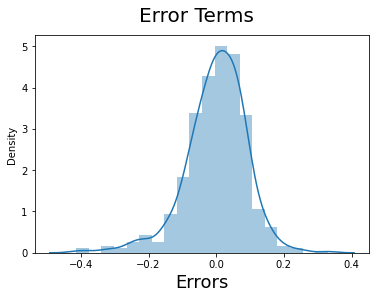

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- Error terms are normally distributed 

### Multicolinearity

In [68]:
VIF(X)

,Features,VIF
3,windspeed,4.65
2,temp,3.90
4,spring,2.02
0,yr,1.96
5,summer,1.95
6,winter,1.63
10,Mist,1.57
7,Sep,1.20
8,Sun,1.16
9,Light Rain,1.09


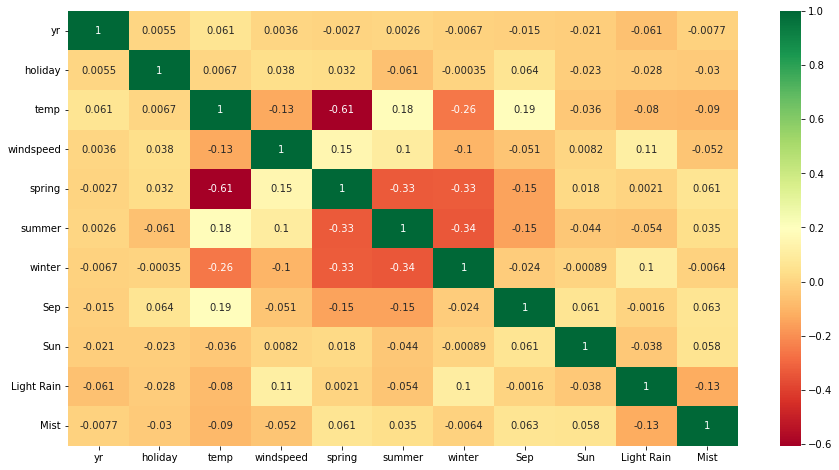

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot = True, cmap="RdYlGn")
plt.show()

As we can see from the above heatmap there is no multicolinearity 

### Homoscedasticity

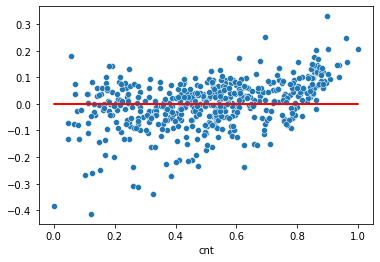

In [70]:
y_train_pred = lr_5.predict(X_train_lm_5)
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.show()

From the above plot we can see that the residuals have constant variance at every level of x.

### Linearity 

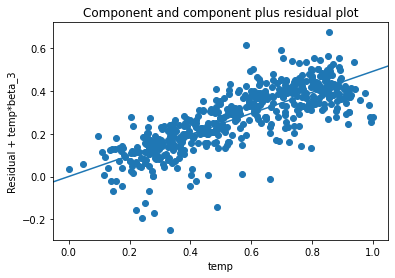

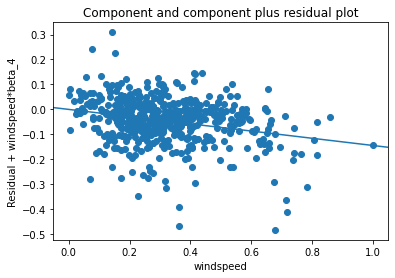

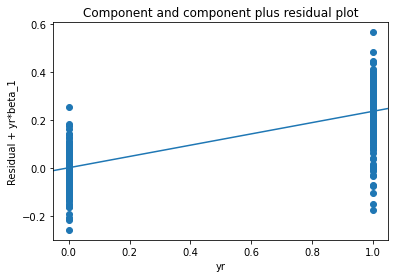

In [71]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'yr')
plt.show()

Linearity Can be Observed from the above plot 

## Making Prediction using the Final Model 
We have build the model and checked the normality of error terms,Now we will make predictions using the fifth model.

##### Applying the Scaling on the Test Data

In [72]:
# Applying Scaling 
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
333,0,0,1,0.341207,0.324343,0.632030,0.488582,0.413139,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,1,1.013904,1.013214,0.515242,0.185727,0.375403,0,0,...,0,0,1,0,0,0,0,0,0,0
279,0,0,0,0.579699,0.594242,0.705024,-0.049804,0.570985,0,0,...,1,0,0,0,1,0,0,0,0,0
483,1,0,1,0.512322,0.518402,0.604980,0.154750,0.722734,0,1,...,0,0,1,0,0,0,0,0,0,0
267,0,0,1,0.737981,0.689572,0.870760,0.010767,0.573861,0,0,...,0,1,0,0,0,0,1,0,0,1


In [74]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,0.578218,0.570000,0.651028,0.305357,0.529866,0.251142,0.246575,...,0.082192,0.123288,0.159817,0.127854,0.164384,0.136986,0.132420,0.123288,0.022831,0.324201
std,0.499633,0.198967,0.470841,0.244747,0.237661,0.140203,0.169255,0.221380,0.434663,0.432005,...,0.275286,0.329520,0.367276,0.334692,0.371472,0.344621,0.339723,0.329520,0.149707,0.469148
min,0.000000,0.000000,0.000000,0.049103,0.031559,0.311386,-0.049804,0.089623,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.370502,0.384923,0.551524,0.184392,0.384261,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.593602,0.604831,0.641141,0.288013,0.525541,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.784503,0.761870,0.748390,0.406913,0.707087,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.029946,1.064361,1.002146,0.800818,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test & y_test 

In [75]:
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
Column_1 = X.columns

X_test = X_test[Column_1]

In [77]:
# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [78]:
# Making Prediction using Model - 5  
y_pred = lr_5.predict(X_test_lm_5)

In [79]:
# Importing r2_score 
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.7977734802743532

## Model Evaluation 
 Plotting the graph for actual values & predicted values.

Text(0, 0.5, 'y_pred')

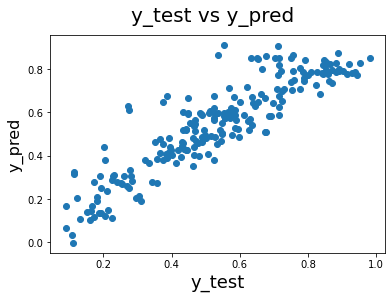

In [80]:
# Plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)     

##### The equation of our best fitted line is:

 $ cnt = 0.174 + 0.236 \times yr - 0.067 \times holiday + 0.493 \times temp - 0.145 \times windspeed - 0.059 \times spring + 0.059 \times summer + 0.095 \times winter + 0.069 \times Sep + 0.030 \times Sun - 0.262 \times Light Rain - 0.078 \times Mist $

In [81]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = 1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print(adjusted_r2)

0.7870271434773382


### Comparision Bretween Training Data  & Testing Data 

- Train Data R2 = 0.835
- Test Data R2 = 0.797
- Train Data Adj R2 = 0.832
- Test Data Adj R2 = 0.787 